In [141]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, ttest_ind, pearsonr
import random
import time
import math

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn import model_selection, preprocessing, compose

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import mannwhitneyu, ttest_ind, pearsonr

In [142]:
apportion_2020 = pd.read_csv("data/apportionmentUS_2020.csv")
apportion_2020 = apportion_2020.drop(["Unnamed: 3", "Unnamed: 4"], axis=1)
apportion_2020.rename(columns={"U.S. Department of Commerce": "state", "Unnamed: 1": "population", "Unnamed: 2": "app_reps"}, inplace=True)
apportion_2020 = apportion_2020.drop([0, 1, 2, 53])
apportion_2020 = apportion_2020.dropna()
apportion_2020.reset_index(inplace=True)
apportion_2020 = apportion_2020.drop("index", axis=1)

apportion_2020["pop_as_int"] = apportion_2020.population.apply(lambda x: asint(x))
apportion_2020["pop_per_rep"] = apportion_2020.apply(lambda x: math.ceil(x.pop_as_int/int(x.app_reps)), axis=1)
apportion_2020

,state,population,app_reps,pop_as_int,pop_per_rep
0,Alabama,"5,030,053",7,5030053,718579
1,Alaska,"736,081",1,736081,736081
2,Arizona,"7,158,923",9,7158923,795436
3,Arkansas,"3,013,756",4,3013756,753439
4,California,"39,576,757",52,39576757,761092
5,Colorado,"5,782,171",8,5782171,722772
6,Connecticut,"3,608,298",5,3608298,721660
7,Delaware,"990,837",1,990837,990837
8,Florida,"21,570,527",28,21570527,770376
9,Georgia,"10,725,274",14,10725274,766091


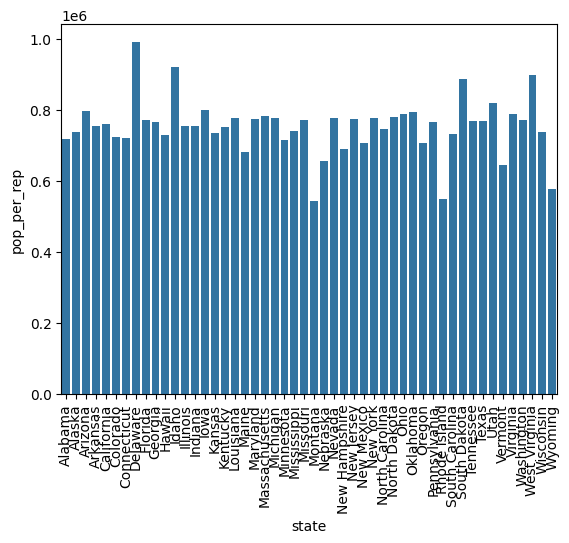

In [143]:
sns.barplot(data=apportion_2020, x="state", y="pop_per_rep")
plt.xticks(rotation=90)
plt.show()

In [155]:
total_population = sum(list(apportion_2020.pop_as_int))
total_population

total_reps = math.ceil(np.cbrt(total_population))
print(total_reps)

def apportion(x):
    reps = x*total_reps
    if reps % 1 >= 0.5:
        return math.ceil(reps)
    else:
        return math.floor(reps)

apportion_2020["percentage"] = apportion_2020.pop_as_int.apply(lambda x: x/total_population)
apportion_2020["reps_cr"] = apportion_2020.percentage.apply(lambda x: apportion(x))
print(sum(list(apportion_2020.reps_cr)))

apportion_2020

692
691


,state,population,app_reps,pop_as_int,pop_per_rep,percentage,reps_cr
0,Alabama,"5,030,053",7,5030053,718579,0.015192,11
1,Alaska,"736,081",1,736081,736081,0.002223,2
2,Arizona,"7,158,923",9,7158923,795436,0.021621,15
3,Arkansas,"3,013,756",4,3013756,753439,0.009102,6
4,California,"39,576,757",52,39576757,761092,0.119528,83
5,Colorado,"5,782,171",8,5782171,722772,0.017463,12
6,Connecticut,"3,608,298",5,3608298,721660,0.010898,8
7,Delaware,"990,837",1,990837,990837,0.002992,2
8,Florida,"21,570,527",28,21570527,770376,0.065146,45
9,Georgia,"10,725,274",14,10725274,766091,0.032392,22


In [156]:
apportion_2020["pop_per_rep_cr"] = apportion_2020.apply(lambda x: math.ceil(x.pop_as_int/int(x.reps_cr)), axis=1)
apportion_2020

,state,population,app_reps,pop_as_int,pop_per_rep,percentage,reps_cr,pop_per_rep_cr
0,Alabama,"5,030,053",7,5030053,718579,0.015192,11,457278
1,Alaska,"736,081",1,736081,736081,0.002223,2,368041
2,Arizona,"7,158,923",9,7158923,795436,0.021621,15,477262
3,Arkansas,"3,013,756",4,3013756,753439,0.009102,6,502293
4,California,"39,576,757",52,39576757,761092,0.119528,83,476829
5,Colorado,"5,782,171",8,5782171,722772,0.017463,12,481848
6,Connecticut,"3,608,298",5,3608298,721660,0.010898,8,451038
7,Delaware,"990,837",1,990837,990837,0.002992,2,495419
8,Florida,"21,570,527",28,21570527,770376,0.065146,45,479346
9,Georgia,"10,725,274",14,10725274,766091,0.032392,22,487513


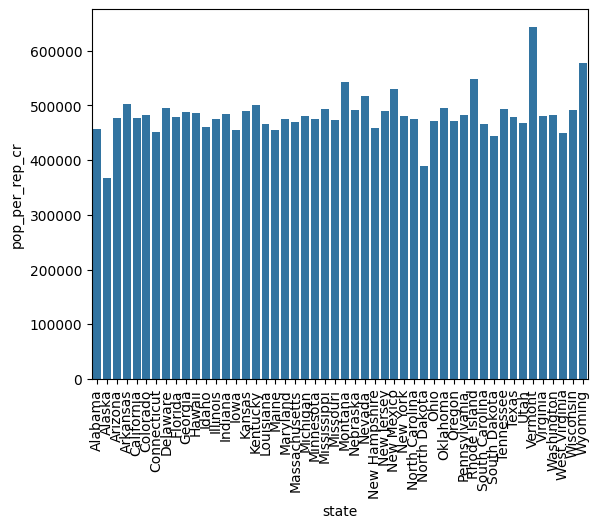

In [157]:
sns.barplot(data=apportion_2020, x="state", y="pop_per_rep_cr")
plt.xticks(rotation=90)
plt.show()

In [158]:
apportion_2020.pop_per_rep_cr.describe()

count        50.000000
mean     482839.380000
std       39943.929415
min      368041.000000
25%      468145.000000
50%      479779.000000
75%      491301.250000
max      643503.000000
Name: pop_per_rep_cr, dtype: float64